#  Détection de phonèmes par analyse du signal vocal

L'objectif de ce TP consiste à détecter et reconnaître les phonèmes  à partir de fichiers sonores au format *.wav* via l'analyse cepstrale.



Vous disposez d'une base d'apprentissage et une base de test. Il faut reconnaître tous les phénomènes suivants :
$$'a','e','e\_aigu','e\_grave','i','o','o\_ouvert','ou','u'$$


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import scipy
import sklearn
import math

Les lignes de code suivantes permettent de transformer le fichier audio en matrice de paramètres appélés MFCC (Mel Frequency Cepstral Coefficient) en utilisant la librairie python *librosa*. Ces paramètres permettent d'extraire au mieux le contenu vocal fréquenciel du signal audio.

Comme chaque fichier a une durée différente, on calcule la moyenne des MFCC sur toutes les fenêtres de discrétisation. 

La matrice de sortie est composée d'autant de vecteurs lignes que de fichiers audio. Le nombre de colonnes correspond à la dimension du vecteur moyen représentatif des MFCC : ici 13.

In [ ]:
import librosa

In [ ]:
from google.colab import drive as drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
from os import listdir
from os.path import isfile, join
path = "/content/gdrive/MyDrive/TP5_CS/Data/"
fichiers = [f for f in listdir(path)]
sort_fichiers = sorted(fichiers)
DataMFCC=[]
label=[]
#print(sort_fichiers)

# Calcul des MFCC sur tous les fichiers de la base de données
for i in range(len(sort_fichiers)):
    # chargement du fichier audio
    y, sr = librosa.load(path + sort_fichiers[i])
    mfccBA = librosa.feature.mfcc(y=y, sr=sr, hop_length=1024, htk=True, n_mfcc=13)
    # Stockage et calcul du MFCC moyen pour le phonème
    DataMFCC.append(np.mean(mfccBA,axis=1))
    # Stockage de l'étiquette label
    label.append(i//10)

DataMFCC=np.asarray(DataMFCC)
label=np.asarray(label)
print(DataMFCC.shape)

(90, 13)


In [ ]:
# Phonème associé à chaque valeur de label
Liste_label=['a','e','e\_aigu','e\_grave','i','o','o\_ouvert','ou','u']

In [ ]:
# Séparation de l'ensemble de données en Base d'apprentissage et base de test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(DataMFCC, label, random_state=0,test_size=0.2)

print('Dimension Base d apprentissage (x, y) :', X_train.shape, y_train.shape)
print('Dimension Base de test(x, y) :', X_test.shape, y_test.shape)

Dimension Base d apprentissage (x, y) : (72, 13) (72,)
Dimension Base de test(x, y) : (18, 13) (18,)


# Partie I : Classification des phonèmes sans prétraitement 

Réaliser une classification de ces phonèmes par une méthode d'apprentissage supervisé et une méthode d'apprentissage non supervisé de votre choix en utilisant soit les codes des TP précédents, soit en utilisant la librairie *scikit-learn*.

Pour chaque résultat obtenu, calculer la matrice de confusion et utiliser le triangle voyellique présenté ci-après pour interpréter les résultats.

## Méthode supervisée  : 
indiquer quelle est la méthode superviée de votre choix et calculer la matrice de confusion associée. 

## Régression logistique

In [ ]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((72, 13), (72,), (18, 13), (18,))

In [ ]:
%time
from sklearn.linear_model import LogisticRegression

# definir le modèle et faire la prédiction
logistic_reg = LogisticRegression()
logistic_reg.fit(X_train, y_train)
y_pred = logistic_reg.predict(X_test)

CPU times: user 6 µs, sys: 1e+03 ns, total: 7 µs
Wall time: 8.58 µs


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[[3 0 0 0 0 0 0 0 0]
 [0 2 0 0 0 0 0 0 0]
 [0 0 2 0 0 0 0 0 0]
 [0 0 0 2 0 0 0 0 0]
 [0 0 0 0 3 0 0 0 0]
 [0 0 0 0 0 2 0 0 0]
 [0 0 0 0 0 0 2 0 0]
 [0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 1]]


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


precision =  100.0


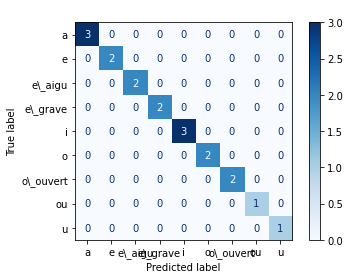

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
# Calcul de la matrice de confusion
cm = confusion_matrix(y_test,y_pred)
print(cm)

# plot la matrice de confusion
color = 'white'
matrix = plot_confusion_matrix(logistic_reg, X_test, y_test, 
                               display_labels=['a','e','e\_aigu','e\_grave','i','o','o\_ouvert','ou','u'],cmap=plt.cm.Blues)
matrix.ax_.set_title('Confusion Matrix of logistic regression', color=color)

# calculer la précision
precision = np.mean(y_test ==y_pred)*100
print("precision = ",precision)

## Classification bayesienne

In [ ]:
%time
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 9.54 µs


[[3 0 0 0 0 0 0 0 0]
 [0 2 0 0 0 0 0 0 0]
 [0 0 2 0 0 0 0 0 0]
 [0 0 0 2 0 0 0 0 0]
 [0 0 1 0 2 0 0 0 0]
 [0 0 0 0 0 2 0 0 0]
 [0 0 0 0 0 0 2 0 0]
 [0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 1]]
precision =  94.44444444444444


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


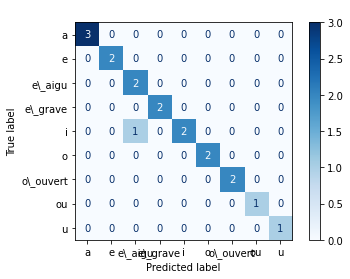

In [ ]:
# Calcul de la matrice de confusion
cm = confusion_matrix(y_test,y_pred)
print(cm)

# plot la matrice de confusion
color = 'white'
matrix = plot_confusion_matrix(clf, X_test, y_test, 
                               display_labels=['a','e','e\_aigu','e\_grave','i','o','o\_ouvert','ou','u'],cmap=plt.cm.Blues)
matrix.ax_.set_title('Confusion Matrix of naive bayes', color=color)

# calculer la précision
precision = np.mean(y_test ==y_pred)*100
print("precision = ",precision)

## Arbre de décision

In [ ]:
%%time
# definir le modèle et faire la prédiction
from sklearn import tree
tree_model = tree.DecisionTreeClassifier()
tree_model.fit(X_train, y_train)
y_pred = clf.predict(X_test)

CPU times: user 4.24 ms, sys: 24 µs, total: 4.26 ms
Wall time: 5.62 ms


[[3 0 0 0 0 0 0 0 0]
 [0 2 0 0 0 0 0 0 0]
 [0 0 2 0 0 0 0 0 0]
 [0 0 0 2 0 0 0 0 0]
 [0 0 1 0 2 0 0 0 0]
 [0 0 0 0 0 2 0 0 0]
 [0 0 0 0 0 0 2 0 0]
 [0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 1]]
precision =  94.44444444444444


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


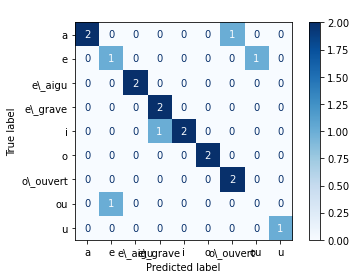

In [ ]:
# Calcul de la matrice de confusion
cm = confusion_matrix(y_test,y_pred)
print(cm)

# plot la matrice de confusion
color = 'white'
matrix = plot_confusion_matrix(tree_model, X_test, y_test, 
                               display_labels=['a','e','e\_aigu','e\_grave','i','o','o\_ouvert','ou','u'],cmap=plt.cm.Blues)
matrix.ax_.set_title('onfusion Matrix of decision tree', color=color)

# calculer la précision
precision = np.mean(y_test ==y_pred)*100
print("precision = ",precision)

## KPP

In [ ]:
%%time
# definir le modèle et faire la prédiction
from sklearn.neighbors import KNeighborsClassifier
kpp_model = KNeighborsClassifier(n_neighbors=3)
kpp_model.fit(X_train, y_train)
y_pred = kpp_model.predict(X_test)

CPU times: user 2.78 ms, sys: 1.19 ms, total: 3.96 ms
Wall time: 8.31 ms


[[2 0 0 0 0 0 1 0 0]
 [0 2 0 0 0 0 0 0 0]
 [0 0 2 0 0 0 0 0 0]
 [0 0 0 2 0 0 0 0 0]
 [0 0 0 0 3 0 0 0 0]
 [0 0 0 0 0 2 0 0 0]
 [0 0 0 0 0 0 2 0 0]
 [0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 1]]
precision =  94.44444444444444


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


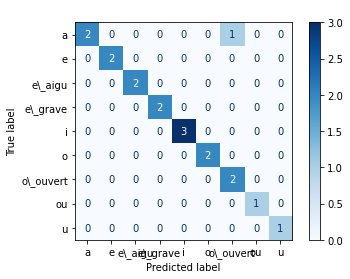

In [ ]:
# Calcul de la matrice de confusion
cm = confusion_matrix(y_test,y_pred)
print(cm)

# plot la matrice de confusion
color = 'white'
matrix = plot_confusion_matrix(kpp_model, X_test, y_test, 
                               display_labels=['a','e','e\_aigu','e\_grave','i','o','o\_ouvert','ou','u'],cmap=plt.cm.Blues)
matrix.ax_.set_title('onfusion Matrix of knn', color=color)

# calculer la précision
precision = np.mean(y_test ==y_pred)*100
print("precision = ",precision)

In [ ]:
# calculer la précision
precision = np.mean(y_test ==y_pred)*100
print(precision)

94.44444444444444


## Méthode non supervisée

indiquer quelle est la méthode non supervisée de votre choix et calculer la matrice de confusion associée. 

## K-means

In [ ]:
y_train

array([7, 4, 2, 0, 6, 4, 8, 5, 7, 7, 8, 0, 6, 7, 2, 1, 5, 5, 7, 5, 5, 0,
       1, 1, 4, 3, 0, 8, 6, 0, 3, 2, 1, 3, 2, 5, 1, 3, 6, 5, 7, 0, 3, 7,
       1, 8, 1, 2, 4, 8, 8, 6, 2, 8, 7, 2, 3, 4, 3, 6, 5, 1, 7, 3, 2, 8,
       0, 8, 6, 6, 4, 4])

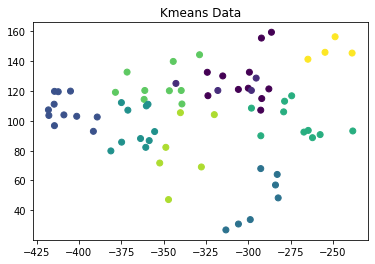

CPU times: user 246 ms, sys: 0 ns, total: 246 ms
Wall time: 198 ms


In [ ]:
%%time
# definir le modèle et faire la prédiction
from sklearn.cluster import KMeans
k_means_model = KMeans(n_clusters = 9)
k_means_model.fit(X_train)
y_pred = k_means_model.labels_

# représenter la classification des données
plt.scatter(X_train[:,0],X_train[:,1], c = k_means_model.labels_)

plt.title('Kmeans Data')
plt.show()

[[3 0 0 0 0 0 0 0 4]
 [0 4 3 0 1 0 0 0 0]
 [0 0 0 4 0 2 0 2 0]
 [0 0 0 0 0 8 0 0 0]
 [0 0 0 3 0 0 0 4 0]
 [1 0 0 0 0 0 7 0 0]
 [7 0 0 0 0 0 1 0 0]
 [0 0 8 0 0 0 1 0 0]
 [0 0 0 0 9 0 0 0 0]]
precision =  11.11111111111111


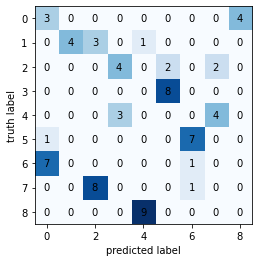

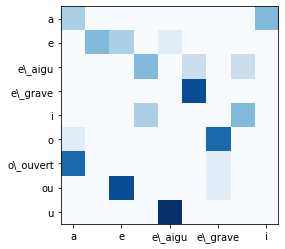

In [ ]:
# Calcul de la matrice de confusion
cm = confusion_matrix(y_train,y_pred)
print(cm)

# plot la matrice de confusion
plt.imshow(cm,cmap=plt.cm.Blues)
for (i, j), z in np.ndenumerate(cm):
    plt.text(j, i, z, ha='center', va='center')
  
plt.xlabel("predicted label")
plt.ylabel("truth label")

labels = ['a','e','e\_aigu','e\_grave','i','o','o\_ouvert','ou','u']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.imshow(cm, cmap=plt.cm.Blues)

ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)

# calculer la précision
precision = np.mean(y_train ==y_pred)*100
print("precision = ",precision)

## knn

In [ ]:
%%time
# definir le modèle et faire la prédiction
import numpy as np
from sklearn.neighbors import NearestNeighbors
knn_model = NearestNeighbors(n_neighbors=5)
knn_model.fit(X_train)
distances, indices = knn_model.kneighbors(X_train)
y_pred = []
for j in range(len(indices)):
  ppv_list = [y_train[i] for i in indices[j]]
  ppv_list = [i.tolist() for i in ppv_list]
  most_frequency = 0
  label_ppv = ppv_list[0]

  for v in ppv_list:
      counter = ppv_list.count(v)
      if(counter > most_frequency):
        most_frequency = counter
        label_ppv = v     
  
  y_pred.append(label_ppv)


CPU times: user 3.97 ms, sys: 0 ns, total: 3.97 ms
Wall time: 4.89 ms


[[7 0 0 0 0 0 0 0 0]
 [0 7 0 0 0 0 0 0 1]
 [0 0 8 0 0 0 0 0 0]
 [0 0 0 8 0 0 0 0 0]
 [0 0 0 0 7 0 0 0 0]
 [0 0 0 0 0 7 1 0 0]
 [0 0 0 0 0 0 8 0 0]
 [0 0 0 0 0 1 0 8 0]
 [0 0 0 0 0 0 0 0 9]]
precision =  95.83333333333334


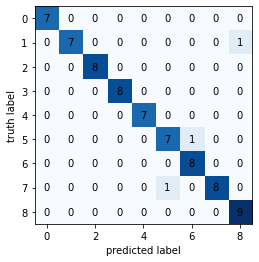

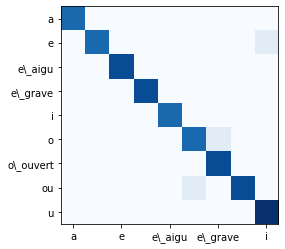

In [ ]:
# Calcul de la matrice de confusion
cm = confusion_matrix(y_train,y_pred)
print(cm)

# plot la matrice de confusion
plt.imshow(cm,cmap=plt.cm.Blues)
for (i, j), z in np.ndenumerate(cm):
    plt.text(j, i, z, ha='center', va='center')
  
plt.xlabel("predicted label")
plt.ylabel("truth label")

labels = ['a','e','e\_aigu','e\_grave','i','o','o\_ouvert','ou','u']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.imshow(cm, cmap=plt.cm.Blues)

ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)

# calculer la précision
precision = np.mean(y_train ==y_pred)*100
print("precision = ",precision)

# Partie II : classification des phonèmes avec prétraitement 


## Méthode supervisée


In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

## Classification bayesienne

In [ ]:
clf = GaussianNB()
clf.fit(X_train_pca, y_train)
y_pred = clf.predict(X_test_pca)

[[3 0 0 0 0 0 0 0 0]
 [0 2 0 0 0 0 0 0 0]
 [0 0 2 0 0 0 0 0 0]
 [0 0 1 1 0 0 0 0 0]
 [0 0 1 0 2 0 0 0 0]
 [0 0 0 0 0 2 0 0 0]
 [1 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 1]]
precision =  83.33333333333334


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


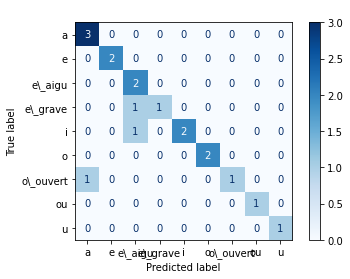

In [ ]:
# Calcul de la matrice de confusion
cm = confusion_matrix(y_test,y_pred)
print(cm)

# plot la matrice de confusion
color = 'white'
matrix = plot_confusion_matrix(clf, X_test_pca, y_test, 
                               display_labels=['a','e','e\_aigu','e\_grave','i','o','o\_ouvert','ou','u'],cmap=plt.cm.Blues)
matrix.ax_.set_title('Confusion Matrix of naive bayes', color=color)

# calculer la précision
precision = np.mean(y_test ==y_pred)*100
print("precision = ",precision)

## knn

[[2 0 0 0 0 0 1 0 0]
 [0 1 0 0 0 0 0 0 1]
 [0 0 2 0 0 0 0 0 0]
 [0 1 0 1 0 0 0 0 0]
 [0 0 0 0 3 0 0 0 0]
 [0 0 0 0 0 2 0 0 0]
 [0 0 0 0 0 0 2 0 0]
 [0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 1]]
83.33333333333334


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


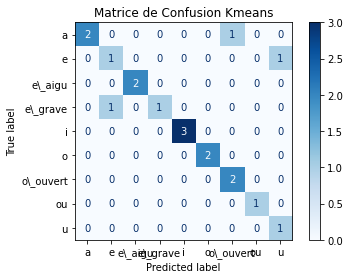

In [ ]:
# modèle
kpp_model.fit(X_train_pca, y_train)
y_pred = kpp_model.predict(X_test_pca)

## Calcul de la matrice de confusion
cm = confusion_matrix(y_test,y_pred)
print(cm)

# afficher la matrice de confusion
disp = plot_confusion_matrix(kpp_model,X_test_pca , y_test,
                                 display_labels=['a','e','e\_aigu','e\_grave','i','o','o\_ouvert','ou','u'],
                                 cmap=plt.cm.Blues,
                                 normalize=None)
disp.ax_.set_title('Matrice de Confusion Kmeans')

#évaluer le modèle
precision = np.mean(y_test ==y_pred)*100
print(precision)

## Méthode non supervisée

## Knn

In [ ]:
%%time
# definir le modèle et faire la prédiction
import numpy as np
from sklearn.neighbors import NearestNeighbors
knn_model = NearestNeighbors(n_neighbors=5)
knn_model.fit(X_train_pca)
distances, indices = knn_model.kneighbors(X_train_pca)
y_pred = []
for j in range(len(indices)):
  ppv_list = [y_train[i] for i in indices[j]]
  ppv_list = [i.tolist() for i in ppv_list]
  most_frequency = 0
  label_ppv = ppv_list[0]

  for v in ppv_list:
      counter = ppv_list.count(v)
      if(counter > most_frequency):
        most_frequency = counter
        label_ppv = v     
  
  y_pred.append(label_ppv)

CPU times: user 2.32 ms, sys: 862 µs, total: 3.18 ms
Wall time: 3.32 ms


[[7 0 0 0 0 0 0 0 0]
 [0 5 0 0 0 0 0 2 1]
 [0 0 7 1 0 0 0 0 0]
 [0 0 0 8 0 0 0 0 0]
 [0 0 0 0 7 0 0 0 0]
 [0 0 0 0 0 7 1 0 0]
 [0 0 0 0 0 1 7 0 0]
 [0 0 0 0 0 1 0 8 0]
 [0 0 0 0 0 0 0 0 9]]
precision =  90.27777777777779


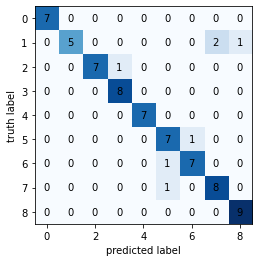

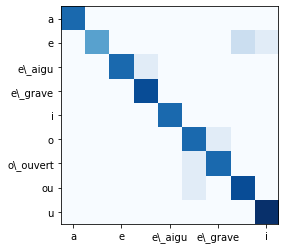

In [ ]:
# Calcul de la matrice de confusion
cm = confusion_matrix(y_train,y_pred)
print(cm)

# plot la matrice de confusion
plt.imshow(cm,cmap=plt.cm.Blues)
for (i, j), z in np.ndenumerate(cm):
    plt.text(j, i, z, ha='center', va='center')
  
plt.xlabel("predicted label")
plt.ylabel("truth label")

labels = ['a','e','e\_aigu','e\_grave','i','o','o\_ouvert','ou','u']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.imshow(cm, cmap=plt.cm.Blues)

ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)

# calculer la précision
precision = np.mean(y_train ==y_pred)*100
print("precision = ",precision)

## Kmeans

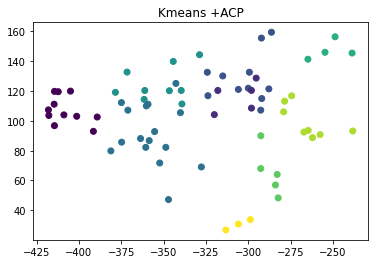

CPU times: user 467 ms, sys: 5.2 ms, total: 472 ms
Wall time: 420 ms


In [ ]:
%%time
# definir le modèle et faire la prédiction
from sklearn.cluster import KMeans
k_means_model = KMeans(n_clusters = 9)
k_means_model.fit(X_train_pca)
y_pred = k_means_model.labels_

# représenter la classification des données
plt.scatter(X_train[:,0],X_train[:,1], c = k_means_model.labels_)

plt.title('Kmeans +ACP')
plt.show()

[[0 0 3 0 0 4 0 0 0]
 [3 3 0 2 0 0 0 0 0]
 [0 1 0 1 0 0 5 1 0]
 [0 1 0 0 0 0 0 7 0]
 [0 0 0 4 0 0 0 0 3]
 [0 0 1 0 7 0 0 0 0]
 [0 0 7 0 1 0 0 0 0]
 [8 0 0 0 1 0 0 0 0]
 [0 0 0 9 0 0 0 0 0]]
precision =  4.166666666666666


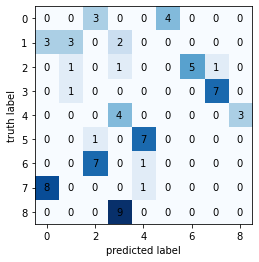

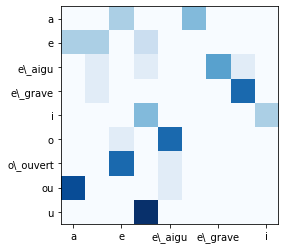

In [ ]:
# Calcul de la matrice de confusion
cm = confusion_matrix(y_train,y_pred)
print(cm)

# plot la matrice de confusion
plt.imshow(cm,cmap=plt.cm.Blues)
for (i, j), z in np.ndenumerate(cm):
    plt.text(j, i, z, ha='center', va='center')
  
plt.xlabel("predicted label")
plt.ylabel("truth label")

labels = ['a','e','e\_aigu','e\_grave','i','o','o\_ouvert','ou','u']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.imshow(cm, cmap=plt.cm.Blues)

ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)

# calculer la précision
precision = np.mean(y_train ==y_pred)*100
print("precision = ",precision)

## Partie III : Analyse des résultats 

Pour chaque résultat obtenu, calculer la matrice de confusion et utiliser le triangle voyellique présenté ci-après pour interpréter les résultats.

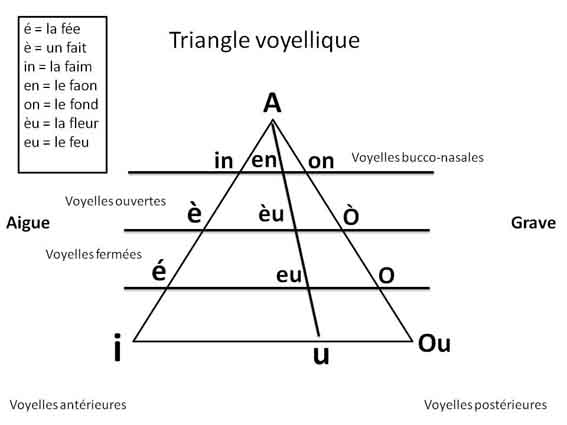

* On comparant les matrices de confusion obtenus par les différents algorithmes et le triangle voyellique, on remarque que la valeur de l'erreur est plus élevée entre les voyelles antérieurs et les voyelles postérieurs, par exemple pour l'algorithme kmeans, on remarque qu'on a une erreur = 10 entre le O_ouvert et le O, et une erreur = 4 entre le e_ègu et le e.
* De plus, on remarque que le knn donne de meilleurs résultats que le kmeans, meme après l'implémentation de l'acp qui a amélioré les résultats.